# Análisis de Datos Históricos de Acciones y Creación de un Cuadro de Mando

Este proyecto tiene como objetivo **extraer datos históricos de precios y de ingresos** de dos empresas destacadas: **Tesla (TSLA) y GameStop (GME)**. Utilizaremos librerías de Python como *yfinance* y técnicas de web *scraping* para reunir la información necesaria.

A continuación se realizarán las siguientes actividades:

- **Extracción de datos bursátiles** de Tesla y GameStop con yfinance
- **Web scraping** de ingresos trimestrales
- **Visualización de datos** mediante gráficos
- **Comparación de tendencias** entre los precios de las acciones y los ingresos

In [2]:
import yfinance as yf
import pandas as pd

### Pregunta 1: Usar yfinance para extraer datos bursátiles de Tesla

Usando la función `Ticker`, introduce el símbolo de cotización de Tesla para crear un objeto de datos. El símbolo de cotización es **TSLA**.

Luego, con el objeto `Ticker` y la función `history`, extrae la información histórica de precios y guárdala en un dataframe llamado `tesla_data`. Establece el parámetro `period` en `max` para obtener toda la información histórica disponible.

Finalmente, restablece el índice y muestra las primeras cinco filas del dataframe usando `head()`.

In [3]:
# Crear objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Extraer datos históricos
tesla_data = tesla.history(period="max")

# Restablecer índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Pregunta 2: Utilizar Web Scraping para extraer datos de ingresos de Tesla

Usa técnicas de **Web Scraping** para extraer los datos trimestrales de ingresos de Tesla desde el sitio web de *Macrotrends*. 

Al finalizar, muestra las últimas cinco filas del dataframe `tesla_revenue` utilizando la función `tail()`.


In [6]:
# Importar librerías necesarias
import requests
from bs4 import BeautifulSoup

# URL de la página con datos de ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Definir encabezados con User-Agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Obtener contenido HTML de la página
html_data = requests.get(url, headers=headers).text

# Analizar contenido con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar todas las tablas
tables = soup.find_all("table")

# Imprimir cuántas tablas encontró (para depuración)
print("Número de tablas encontradas:", len(tables))

# Buscar la tabla correcta por el encabezado
tesla_revenue = []
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                tesla_revenue.append([date, revenue])

# Crear DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# Mostrar las últimas 5 filas
tesla_revenue_df.tail()


Número de tablas encontradas: 6


,Date,Revenue
59,2010-06-30,28
60,2010-03-31,21
61,2009-12-31,
62,2009-09-30,46
63,2009-06-30,27


### Pregunta 3: Usar yfinance para extraer datos bursátiles de GameStop

Usando la función `Ticker`, introduce el símbolo de cotización de GameStop para crear un objeto de datos. El símbolo de cotización es **GME**.

Luego, con el objeto `Ticker` y la función `history`, extrae la información histórica de precios y guárdala en un dataframe llamado `gme_data`. Establece el parámetro `period` en `max` para obtener toda la información histórica disponible.

Finalmente, restablece el índice y muestra las primeras cinco filas del dataframe usando `head()`.


In [8]:
# Crear objeto Ticker para GameStop
gme = yf.Ticker("GME")

# Extraer datos históricos
gme_data = gme.history(period="max")

# Restablecer índice
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Pregunta 4: Usar Webscraping para extraer datos de ingresos de GameStop

Usando técnicas de web scraping, extrae los datos trimestrales de ingresos de GameStop desde Macrotrends. La URL que se debe utilizar es:

https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue

Al finalizar, muestra las últimas cinco filas del dataframe `gme_revenue_df` utilizando la función `tail()`.


In [12]:
# Importar librerías necesarias
import requests
from bs4 import BeautifulSoup

# URL de la página con datos de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Encabezados HTTP para simular navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Obtener contenido HTML de la página
html_data = requests.get(url, headers=headers).text

# Analizar contenido con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar todas las tablas
tables = soup.find_all("table")

# Mostrar cuántas tablas encontró
print("Número de tablas encontradas:", len(tables))

# Inicializar lista de datos
gme_revenue = []

# Buscar la tabla correcta por el encabezado
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                gme_revenue.append([date, revenue])

# Crear DataFrame
gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])

# Mostrar las últimas 5 filas
gme_revenue_df.tail()


Número de tablas encontradas: 6


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


### Pregunta 5: Representar gráficamente las acciones de Tesla

Utiliza la función `make_graph` para graficar el precio de cierre de las acciones de Tesla. El dataframe utilizado es `tesla_data`.

El gráfico debe mostrar el eje X con las fechas y el eje Y con los precios de cierre.

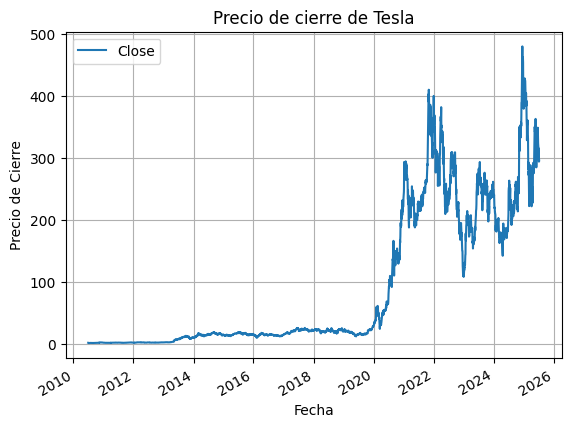

In [13]:
# Definir la función make_graph si no existe
def make_graph(data, name):
    import matplotlib.pyplot as plt

    # Graficar precios de cierre
    data.plot(x="Date", y="Close", title=f"Precio de cierre de {name}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True)
    plt.show()

# Llamar la función para Tesla
make_graph(tesla_data, "Tesla")

### 💠 Pregunta 6: Representar gráficamente las acciones de GameStop

Utiliza la función `make_graph` para graficar el precio de cierre de las acciones de GameStop. El dataframe utilizado es `gme_data`.

El gráfico debe mostrar el eje X con las fechas y el eje Y con los precios de cierre.


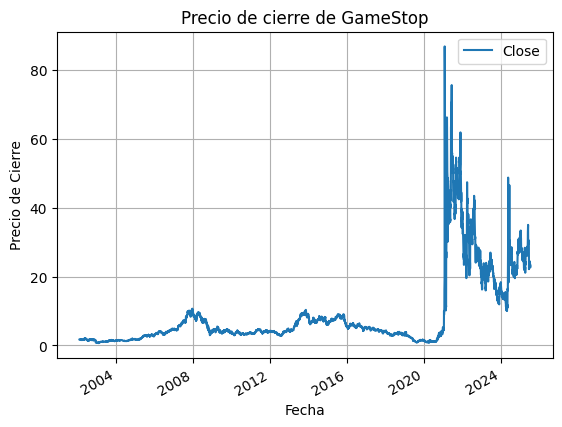

In [14]:
# Llamar la función make_graph para GameStop
make_graph(gme_data, "GameStop")

## Author
Zeus Jonathan Bautista Granados